<a href="https://colab.research.google.com/github/sp-au-mu-nl/MediaDataProgramming/blob/main/intro_numpy/notebook/intro_numpy_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# プロジェクト・恒星運動

In [ ]:
import dill
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
dill.load_session('starData.pkl')

In [ ]:
nObs = spectra.shape[0]
lambdaStart = 630.02
lambdaDelta = 0.14

spectra データが等間隔の波長で収集されており、開始波長($\lambda_{start}$)、間隔 ($\lambda_{delta}$)、観測値の数がわかっています。

記録されたスペクトルにおける最後の波長の値を含む、lambdaEnd ($\lambda_{end}$) という変数を作成します。lambdaEnd は、式 $\lambda_{start}
+(nObs-1)\lambda_{delta}$
 で計算できます。

 lambdaEnd を使用して、スペクトル内の波長を
 $\lambda_{start}$
 から $\lambda_{end}$
 まで $\lambda_{delta}$
 刻みで含む lambdaV ($\lambda$) というベクトルを作成します。

spectra の列は、それぞれ別々の星のスペクトルです。6 列目は星 HD 94028 のスペクトルです。

spectra の 6 列目を、s というベクトルに抽出します。

関数 loglog を関数 plot と同じように使用することで、各軸の対数スケールでデータをプロットできます。
```
plt.loglog(x,y,"*--")
```
両方の軸に対数スケールを使用して、スペクトル (s) を波長 (lambda) の関数としてプロットします。点マーカー (.) と、点をつなぐ実線 (-) を使用します。

x ラベル "Wavelength" と y ラベル "Intensity" をプロットに追加します。

Text(0, 0.5, 'Intensity')

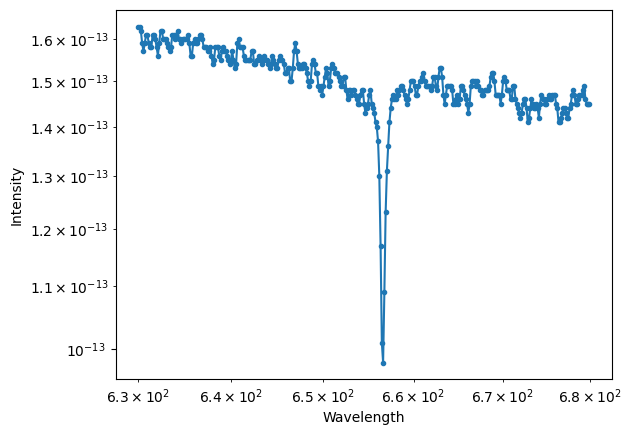

最小値の位置のインデックスは水素アルファ線の場所に相当します。

s の最小値および最小値が発見された位置のインデックスを含む 2 つの変数 sHa と idx を作成します。

 idx を使用して lambda にインデックス付けし、水素アルファ線の波長を求めます。結果を lambdaHa ($\lambda_{Ha}$) として保存します。

ライン (lambdaHa,sHa) は、水素アルファ線の場所です。

x = lambdaHa、y = sHa を、マーカー サイズ ("MarkerSize") が 8 の赤い正方形 ("rs") としてプロットすることで、既存のグラフに点を追加することができます。

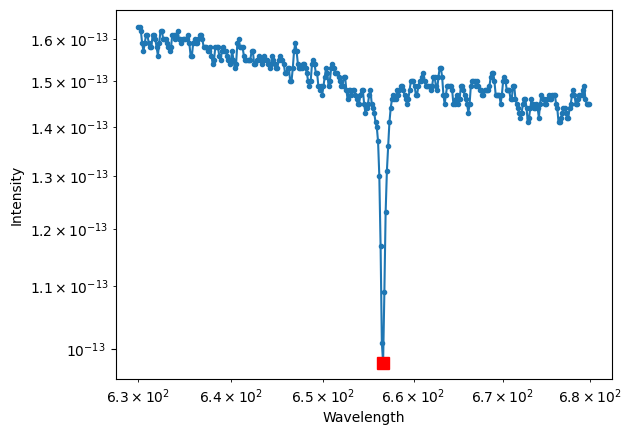

plotly でプロットして確認してみると、HD 94028 の水素アルファ線の波長が 656.62 nm であることがわかります。これは実験室の値である 656.28 nm よりわずかに長くなっています。

星の水素アルファ波長を使用することにより、"赤方偏移係数" (地球に対する星の相対速度) を、式 $z=(\lambda_{Ha}
/656.28)−1$ を使用して計算できます。次に、赤方偏移係数を光の速度 (299792.458km/s) で乗算することにより、速度を計算できます。

In [ ]:
px.line(x=lambdaV,y=s,log_x=True,log_y=True)

In [ ]:
z = (lambdaHa/656.28)-1
speed = z * 299792.458

赤方偏移を求めるスクリプトを作成したら、スクリプトを簡単に変更して、spectra 行列にある任意の星について計算を繰り返します。

spectra の 6 番目ではなく 2 番目の星の赤方偏移計算を実行してみましょう。


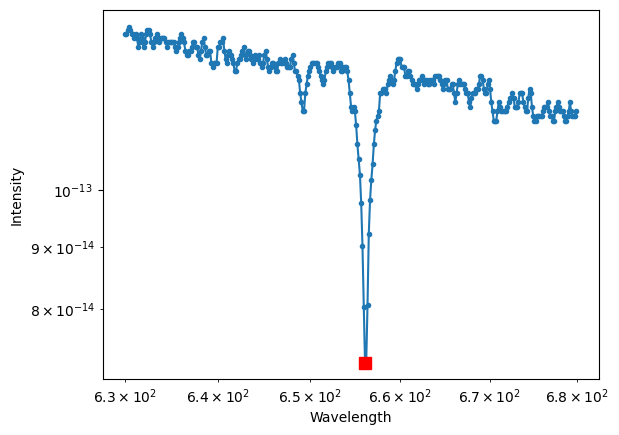

インデックス値を変更する代わりに、下のようにするとスライダーを使用して spectra 内の任意の列を選択することができるようになります。

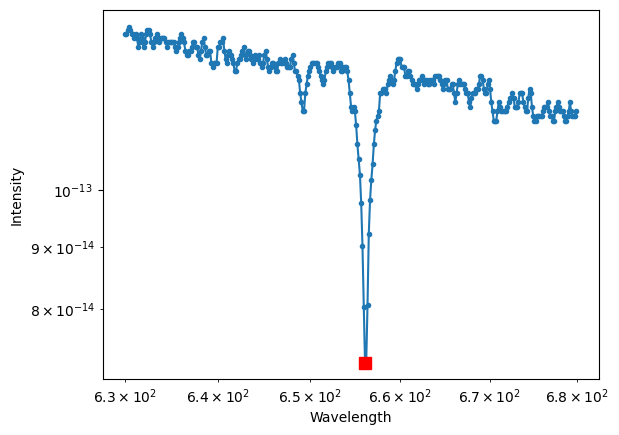

In [ ]:
slider = 1 # @param {type:"slider", min:0, max:10, step:1}

s = spectra[:,slider]

plt.loglog(lambdaV,s,".-")
plt.xlabel("Wavelength")
plt.ylabel("Intensity")

sHa = np.min(s)
idx = np.argmin(s)
lambdaHa = lambdaV[idx]
plt.loglog(lambdaHa,sHa,"rs",ms=8)